In [1]:
import os
import cv2
import numpy as np
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
dataset_folder = r'D:\pythonProject8\Data'

In [4]:
image_width, image_height = 224, 224

# Initialize empty lists to store feature vectors and labels
features = []
labels = []

# Define the class labels
class_labels = ['UPJ_obstruction', 'Normal']

In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Create a new model that outputs the last convolutional layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

In [6]:
for label in class_labels:
    # Get the path to the images for this class
    image_paths = [os.path.join(dataset_folder, label, img) for img in os.listdir(os.path.join(dataset_folder, label))]

    for image_path in image_paths:
        try:
            # Read and preprocess the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (image_width, image_height))
            image = preprocess_input(image)  # Preprocess the image for MobileNetV2
            image = np.expand_dims(image, axis=0)  # Add a batch dimension

            # Extract features from the image
            features.append(feature_extractor.predict(image))
            labels.append(class_labels.index(label))
        except Exception as e:
            print(f"Error processing image {image_path}: {str(e)}")

# Convert features and labels to NumPy arrays
features = np.array(features)
labels = np.array(labels)

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 47ms/step


Test accuracy: 0.9545454545454546
F1-score: 0.9523809523809523


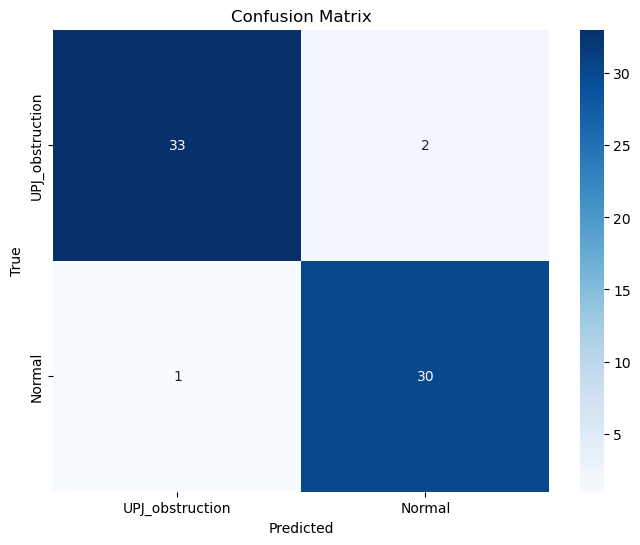

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


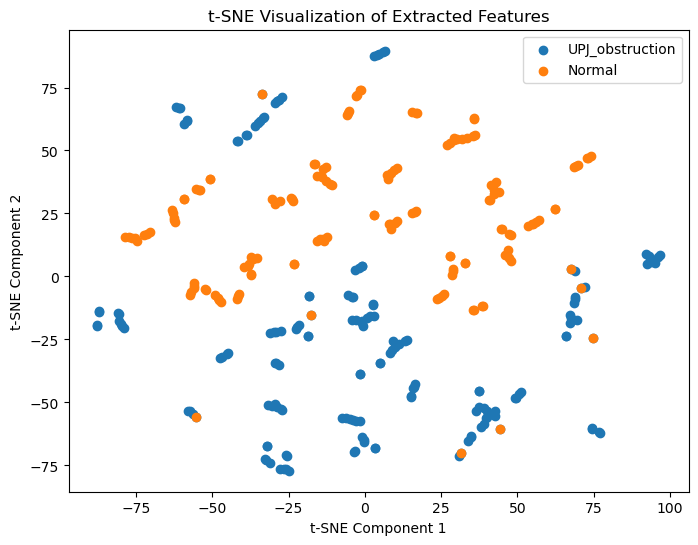

In [9]:
if features.shape[0] == 0:
    print("No valid data found.")
else:
    # Flatten the feature vectors to 2D
    features = np.array(features).reshape(features.shape[0], -1)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Initialize the Support Vector Machine (SVM) classifier
    svm_classifier = SVC(kernel='linear')

    # Train the model on the flattened feature vectors
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)

    f1 = f1_score(y_test, y_pred)
    print("F1-score:", f1)
    
    
    # Calculate a confusion matrix
    # Visualize the confusion matrix
    class_names = class_labels
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_names, columns=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Apply t-SNE to the reduced feature vectors
    tsne = TSNE(n_components=2, perplexity=2, random_state=42)  # Adjust perplexity as needed
    reduced_features_tsne = tsne.fit_transform(features)

    # Create a scatter plot to visualize the t-SNE features
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(class_labels):
        indices = labels == i
        plt.scatter(reduced_features_tsne[indices, 0], reduced_features_tsne[indices, 1], label=label)

    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend()
    plt.title("t-SNE Visualization of Extracted Features")
    plt.show()

IndentationError: unexpected indent (3287125923.py, line 3)